In [5]:
import pandas as pd
import pandas_profiling 
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data =pd.read_csv('C:/Users/Praveen1981/Jupyter Work/Pandas/Data/insurance_data.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
data.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [8]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [9]:
data.mean()

age                 39.666667
bought_insurance     0.518519
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [11]:
data.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [12]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [13]:
pandas_profiling.ProfileReport(data)

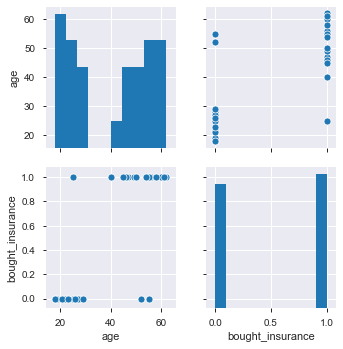

In [14]:
sns.pairplot(data)

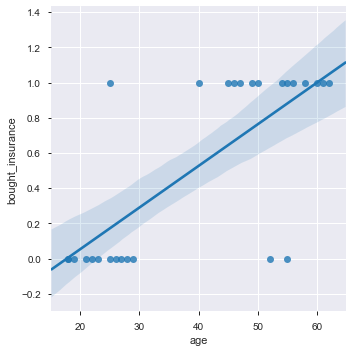

In [15]:
 sns.lmplot('age','bought_insurance',data=data)

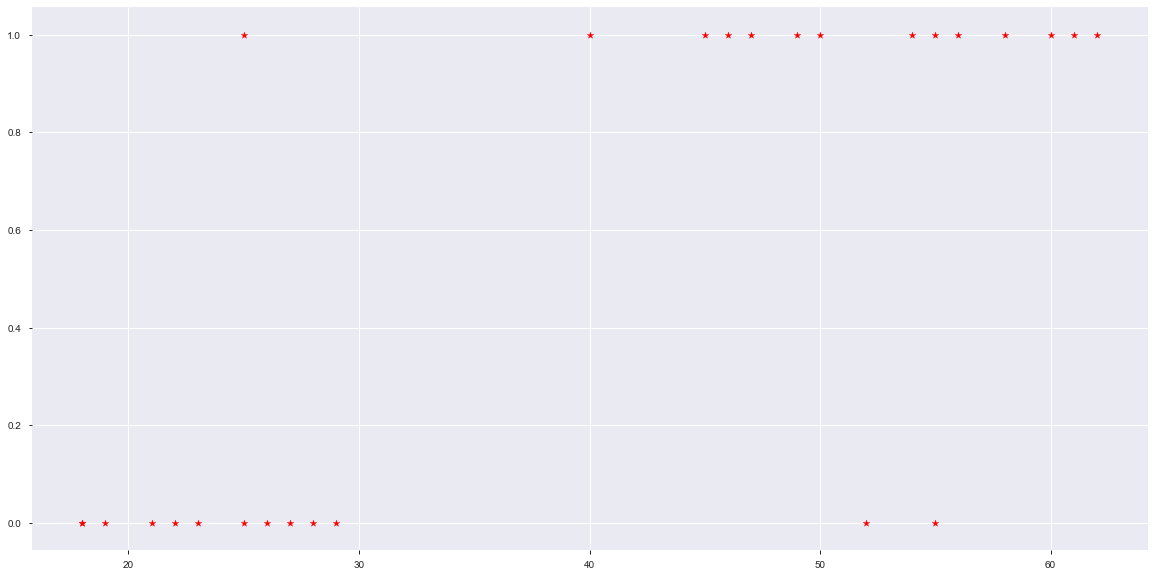

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(data.age,data.bought_insurance, marker='*',color='red')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data[['age']],data.bought_insurance,train_size=0.9)

In [19]:
X_test.shape, y_train.shape, X_train.shape, y_test.shape

((3, 1), (24,), (24, 1), (3,))

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')

In [21]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
X_test

,age
2,47
12,27
13,29


In [23]:
model.coef_

array([[0.12350357]])

In [24]:
model.intercept_

array([-4.73714958])

In [25]:
X_test

,age
2,47
12,27
13,29


In [26]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0], dtype=int64)

In [27]:
y_test

2     1
12    0
13    0
Name: bought_insurance, dtype: int64

In [28]:
model.predict_proba(X_test)

array([[0.25587538, 0.74412462],
       [0.80258875, 0.19741125],
       [0.76052249, 0.23947751]])

In [29]:
model.score(X_test,y_test)

1.0

In [30]:
model.predict([[58]])

array([1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_predicted)

1.0

In [34]:
plt.figure(figsize=(20,10))
import numpy as np

<Figure size 1440x720 with 0 Axes>

In [35]:
slov = ['liblinear','newton-cg','lbfgs','sag','saga']
for i in slov:
    clf = LogisticRegression(solver=i)
    clf.fit(X_train,y_train)
    New_Predict = clf.predict(X_test)
    print(New_Predict)

[1 0 0]
[1 0 0]
[1 0 0]
[1 1 1]
[1 1 1]


c:\users\praveen1981\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [36]:
# Classification Metrics

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [40]:
confusion_matrix(y_predicted,y_test)

array([[2, 0],
       [0, 1]], dtype=int64)

In [41]:
accuracy_score(y_predicted,y_test)

1.0

In [42]:
from sklearn.metrics import log_loss

In [43]:
log_loss(y_predicted,y_test)

9.992007221626415e-16